<a href="https://colab.research.google.com/github/dylanmortimer12/ScoutingReport/blob/master/JIL_Visualizer_Performance_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Justice Innovation Lab Performance Task

Thank you for your interest in the Justice Innovation Lab. We appreciate the time you are taking to apply, and we hope that this performance task gives a chance to demonstrate some of your skills in the context of hypothetical examples.

# Instructions

**PLEASE READ CAREFULLY**

This is not a timed task, but we aimed for a task that does not take more than 6 hours.  You may add more cells for work, but please do not delete any existing  notebook cells. 

**Please use Python or R.** Please use this ipynb file to supply your answers. It should be completed using either a python or R kernel. If you do not have access to a computer capable of running your python or R code, you may use free online computing services such as kaggle or colab. or any other online computing service. We have tested both kaggle and collab and they are sufficiently powerful to complete all the tasks below. 
 - https://www.kaggle.com/notebooks/welcome
 - https://colab.research.google.com/
 

**Please show your work.** We are interested in your thought process, so please show/annotate your code. We prefer that you display images inline rather than in separate files. If you need to install any packages, please include the code required to install them. Eg: 

> ```! pip install new_package  # (for python)```

> ```! install.packages(new.package, dependencies = TRUE) # (for R)```


**Please send us a single compressed file.** When you are done, please follow the directions at the end to submit your work.

**Please let us know if you have any questions.** If you have questions about the task please email hiring@justiceinnovationlab.org (we promise there's a human on the other end, but also expect slow response times).

# Name, Date & Email
Please enter your full name and email address in the markdown space below. 

Name: Dylan Mortimer

Date: 4/1/21

Email: dmortimer@middlebury.edu



# Section 1: Data Manipulation
Suppose a jurisdiction has data on:

Recent traffic stops by some a local Police Department officers (traffic stops data): 
- https://drive.google.com/uc?export=download&id=1fp7716e-l7RZusH6wo8UeUQNM7J0dyYN

Crime incidents reported to the police department (crime incidents data): 
- https://drive.google.com/uc?export=download&id=12gnXMitHQM1nTqBm20Gcq84r7qgttWY-

Using these data, please perform the following tasks.

## Task 1.A 
Load the data we provided and view a few rows of each. As a note, if you're reading in the courts data for Section 2 using pd.read_csv in Python, you may need to use the following syntax to read from the url:

courts_df = pd.read_csv(courts_data_url, names = ['stop_id', 'ticket_amount', 
                                                  'ticket_status'], skiprows = 1)

*Reminder*: for all questions, please write your code in this notebook!  This is what we will review and score. 

In [55]:
import pandas as pd

# downloading traffic stop data

traffic_stop_url = "https://drive.google.com/uc?export=download&id=1fp7716e-l7RZusH6wo8UeUQNM7J0dyYN"

traffic_df = pd.read_csv(traffic_stop_url)


# downloading crime incidents data

crime_incidents_url = "https://drive.google.com/uc?export=download&id=12gnXMitHQM1nTqBm20Gcq84r7qgttWY-"

crime_df = pd.read_csv(crime_incidents_url)

# printing first 5 rows of traffic stop data

print(traffic_df.head())

# printing first 5 rows of crime data

print(crime_df.head())


   stop_id officer_id   stop_date  driver_age driver_sex  ticket driver_race
0    61001          A  2017-03-19          28          f    True       black
1    96921          B  2017-08-02          16          m    True       black
2   190446          E  2017-05-18          69          m   False       black
3   199132          D  2017-05-26          20          f    True       white
4     2120          E  2017-06-26          32          m    True       black
           X          Y       CCN  ...   OBJECTID OCTO_RECORD_ID       OFFENSE
0 -77.058663  38.906846   7093973  ...  341397622    07093973-01  THEFT F/AUTO
1 -77.018036  38.960747   9251904  ...  341453326    09251904-01      homicide
2 -76.984955  38.915147  14060710  ...  341600002    14060710-01      HOMICIDE
3 -77.009722  38.824388  16217337  ...  341698884    16217337-01    homicide-x
4 -77.017203  38.904526  17037020  ...  341703531    17037020-01  THEFT F/AUTO

[5 rows x 25 columns]


## Task 1.B
Crime incidents are reported down to the hour/minute, while stops are only reported down to the day.

Please create a new column based on `REPORT_DAT` column of the crime incidents data that rounds the exact timestamp for the crime down to the day-- for instance, "2017-06-03T12:54:27.000Z" would become "2017-06-03". Call this column `report_daily`

In [56]:
import datetime

rounded_format = "%Y-%m-%d"

# convert REPORT_DAT to datetime object
crime_df['REPORT_DAT'] = pd.to_datetime(crime_df['REPORT_DAT'])

# copy REPORT_DAT and convert datetime format
crime_df['report_daily'] = crime_df['REPORT_DAT'].dt.strftime(rounded_format)


## Task 1.C 
Create a new data set `crimes_by_day` that gives the total count of crime incidents per day. For the purposes of aggregating, you can consider each unique `OBJECTID' as reflecting a different crime incident.

Similarly, create a new data set `stops_by_day` that gives the total count of traffic stops per day. For the purposes of aggregating, you can consider each unique `stop_id` as reflecting a different stop.

In [159]:
# just making sure that each row is a different crime
crime_df['OBJECTID'].is_unique 

crimes_by_day = pd.DataFrame(crime_df.groupby('report_daily', as_index=False)['OBJECTID'].count())

crimes_by_day.columns = ['Date','Total_Crime_Incidents']

crimes_by_day['Date'] = pd.to_datetime(crimes_by_day['Date'])

print((crimes_by_day.head()))

        Date  Total_Crime_Incidents
0 2017-03-01                     80
1 2017-03-02                     59
2 2017-03-03                     84
3 2017-03-04                     77
4 2017-03-05                     61


In [144]:
# group by and count
stops_by_day = pd.DataFrame(traffic_df.groupby('stop_date', as_index=False)['stop_id'].count())

stops_by_day.columns = ['Date','Total_Stops']

stops_by_day['Date'] = pd.to_datetime(stops_by_day['Date'])

print(stops_by_day.head())

        Date  Total_Stops
0 2017-03-01          509
1 2017-03-02          421
2 2017-03-03          413
3 2017-03-04          475
4 2017-03-05          490


## Task 1.D
For either the traffic stops by day or crime incidents by day, check if there are days missing in the period measured. If so, fill them with the mean across all other days for that data.


In [145]:
# Get set of all dates in range
date_range_set = set(pd.date_range(start = stops_by_day['Date'].min(), end = stops_by_day['Date'].max()))

# Get set of all dates in df
stops_set = set(stops_by_day['Date'])

# find missing dates by comparing sets
missing_dates = date_range_set.difference(stops_set)

# add avg in for missing dates
daily_avg = stops_by_day['Total_Stops'].mean()

for d in missing_dates:
  stops_by_day = stops_by_day.append({'Date':d,'Total_Stops': daily_avg},ignore_index=True)



{Timestamp('2017-04-30 00:00:00', freq='D'), Timestamp('2017-06-30 00:00:00', freq='D'), Timestamp('2017-03-30 00:00:00', freq='D'), Timestamp('2017-05-31 00:00:00', freq='D'), Timestamp('2017-07-30 00:00:00', freq='D'), Timestamp('2017-05-30 00:00:00', freq='D'), Timestamp('2017-07-31 00:00:00', freq='D'), Timestamp('2017-03-31 00:00:00', freq='D')}
          Date  Total_Stops
174 2017-04-30   465.206897
175 2017-06-30   465.206897
176 2017-03-30   465.206897
177 2017-05-31   465.206897
178 2017-07-30   465.206897
179 2017-05-30   465.206897
180 2017-07-31   465.206897
181 2017-03-31   465.206897


## Task 1.E
Merge the traffic stops by day data with the crimes by day data. Which specific date has the most traffic stops? Which specific date has the most crime incidents?

In [177]:
# Merge data
joint_by_day = crimes_by_day.merge(stops_by_day, how='outer', on='Date')

# sort by Total stops - 2017-05-01 had the most stops with 535
max_stops = joint_by_day.sort_values(by=['Total_Stops'], ascending=False).reset_index(drop=True)['Date'][0]
print(str(datetime.datetime.strftime(max_stops, '%Y-%m-%d')) + ' had the most stops')

# sort by Total Crimes - 2017-05-29 and 2017-05-08 tied for the most crime incidents with 122
max_crime_incidents = joint_by_day.sort_values(by=['Total_Crime_Incidents'], ascending=False).reset_index(drop=True)['Date'][0]
max_crime_incidents2 = joint_by_day.sort_values(by=['Total_Crime_Incidents'], ascending=False).reset_index(drop=True)['Date'][1]
print(str(datetime.datetime.strftime(max_crime_incidents, '%Y-%m-%d')) + ' and ' + str(datetime.datetime.strftime(max_crime_incidents2, '%Y-%m-%d')) +' had the most crime incidents')



2017-05-01 had the most stops
2017-05-29 and 2017-05-08 had the most crime incidents


## Task 1.F (bonus)
Using a coding-based solution, what day of the week was that date?

In [180]:
# check weekday with weekday() of each date
max_stops.weekday()
max_crime_incidents.weekday()
max_crime_incidents2.weekday()

# each max day was a Monday
print('each weekday was Monday for max traffic stops and max crime incidents')

each weekday was Monday for max traffic stops and max crime incidents


## Task 1.G
Create a plot where the x axis is the date and the y axis is the ratio of traffic stops to crime incidents. Make sure the axis labels are informative.

*Note*: make sure your code prints out the plot. You do not need to attach the plot here.

What seasonal patterns do you notice? Explain in 1-2 sentences


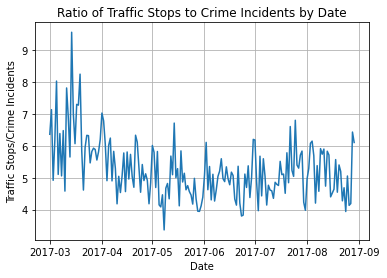

In [181]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(joint_by_day['Date'], (joint_by_day['Total_Stops']/joint_by_day['Total_Crime_Incidents']))

ax.set(xlabel='Date', ylabel='Traffic Stops/Crime Incidents',
       title='Ratio of Traffic Stops to Crime Incidents by Date')
ax.grid()
plt.show()

""" The highest ratio of Traffic Stops to Crime Incidents is at the beginning of the graph in March. 
As the graph continues into spring and summer, the ratio decreases to around 5x Traffic Stops to Crime incidents with another
around August.
"""

## Task 1.H 
Create a new data set `offenses_by_month` that gives the total count of crime incidents by offense type per month. For the purposes of aggregating, you can consider each unique `OBJECTID` as reflecting a different crime incident. Consider that this table should be interpretable to a non-technical audience and may require manipulation of the underlying data.

In [300]:
# add month column to original df
crime_df['month'] = crime_df['REPORT_DAT'].dt.strftime('%m')

# aggregate by month
offenses_by_month = pd.DataFrame(crime_df.groupby(['month','OFFENSE'], as_index=False)['OBJECTID'].count())
print(offenses_by_month)
offenses_by_month.columns = ['Month','Offense_Type','Total_Crime_Incidents']

# Reshape data to make it more readable and easier to graph with pivot()
offenses_by_month = (offenses_by_month.pivot(index='Month',columns='Offense_Type'))
offenses_by_month.columns = offenses_by_month.columns.get_level_values(1)
offenses_by_month = offenses_by_month.reset_index()
offenses_by_month = offenses_by_month.fillna(0)

# get rid of weird column name formatting from pivot()
offenses_by_month.index.name = None
offenses_by_month.columns.name = None

offenses_by_month


   month                     OFFENSE  OBJECTID
0     03    ASSAULT DANGEROUS WEAPON        70
1     03  ASSAULT W/DANGEROUS WEAPON        62
2     03             BURGLARY - HOME        58
3     03                    HOMICIDE         5
4     03         MOTOR VEHICLE THEFT       173
..   ...                         ...       ...
88    08             adult-sex abuse         8
89    08         burglary - business        51
90    08                    homicide         1
91    08                  homicide-x         4
92    08             minor-sex abuse         6

[93 rows x 3 columns]


,Month,ARSON,ASSAULT DANGEROUS WEAPON,ASSAULT W/DANGEROUS WEAPON,BURGLARY - HOME,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE - ADULT,SEX ABUSE - MINOR,THEFT F/AUTO,THEFT/OTHER,adult-sex abuse,burglary - business,homicide,homicide-x,minor-sex abuse
0,03,0.0,70.0,62.0,58.0,5.0,173.0,136.0,8.0,5.0,666.0,1067.0,4.0,59.0,5.0,4.0,5.0
1,04,2.0,86.0,71.0,65.0,2.0,208.0,172.0,8.0,5.0,799.0,1178.0,7.0,73.0,2.0,3.0,8.0
2,05,0.0,90.0,69.0,73.0,1.0,215.0,148.0,5.0,9.0,1053.0,1325.0,8.0,67.0,4.0,3.0,12.0
3,06,1.0,80.0,76.0,55.0,4.0,223.0,187.0,7.0,5.0,890.0,1246.0,11.0,69.0,4.0,3.0,6.0
4,07,0.0,82.0,87.0,65.0,4.0,249.0,200.0,5.0,6.0,821.0,1276.0,5.0,63.0,3.0,5.0,8.0
5,08,1.0,69.0,78.0,65.0,2.0,220.0,176.0,6.0,10.0,775.0,1188.0,8.0,51.0,1.0,4.0,6.0


## Task 1.I 
Create a plot using the `offenses_by_month` dataset that a policy maker would find informative for understanding crime trends. Provide a brief description of the visual and any insights you might draw from it.

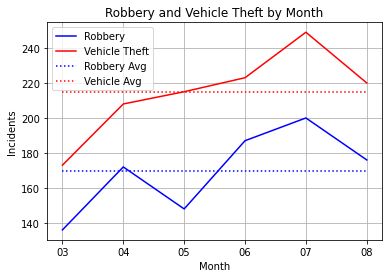

In [311]:
# make arrays of average data to plot averages
robbery_avg = [offenses_by_month['ROBBERY'].mean()]*6
vehicle_avg = [offenses_by_month['MOTOR VEHICLE THEFT'].mean()]*6

fig2, ax2 = plt.subplots()
ax2.plot(offenses_by_month['Month'], offenses_by_month['ROBBERY'], label = "Robbery", color='blue')
ax2.plot(offenses_by_month['Month'], offenses_by_month['MOTOR VEHICLE THEFT'], label = "Vehicle Theft",color='red')

# plot averages
ax2.plot(offenses_by_month['Month'], robbery_avg, label = "Robbery Avg", linestyle=":", color='blue')
ax2.plot(offenses_by_month['Month'], vehicle_avg, label = "Vehicle Avg", linestyle=":", color='red')

ax2.set(xlabel='Month', ylabel='Incidents',
       title='Robbery and Vehicle Theft by Month')
ax2.grid()
plt.legend()
plt.show()

"""
This Visual shows total Robberies and Vehicle thefts by month from March to August.
We can see clearly that once summer starts in June, Robbery and Vehicle thefts begin to increase significantly
to the point of occuring in above monthly average numbers through August. Both offenses peak in July and trend 
down in August closer to their monthly averages.
"""

[Explain any manipulation of the dataset you performed and demonstrate how you would make such manipulation repeatable for future similar datasets.]

I pivoted the dataset so that each row was for one month and each column was the offense type. To make this manipulation repeatable it could be helpful to write a wrapper function for pivot() to clean up all of the weird formatting issues it produces with the column names and the index of the dataset that need to be cleaned up.

## Task 1.J
Criminal justice data is often correlated with geography. Using any of the geography related columns and any other relevant resources [example](https://opendata.dc.gov/datasets/ward-from-2012), create a plot for a policymaker reflecting a geographic-related insight using the crimes dataset. You do not have to create a map or use any other data sources for this portion if you do not wish to.

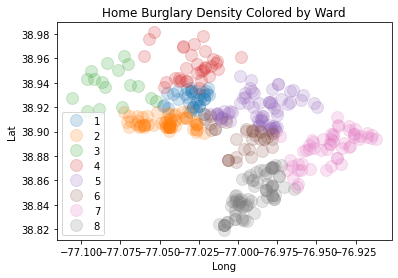

In [324]:
# get vehicle theft data
vehicle_df = crime_df.loc[crime_df['OFFENSE'] == 'BURGLARY - HOME']

groups = vehicle_df.groupby('WARD')

fig3, ax3 = plt.subplots()
for name, group in groups:
    plt.plot(group['X'], group['Y'], marker='o', linestyle='', alpha = .2, markersize=12, label=name)

ax3.set(xlabel='Long', ylabel='Lat',
       title='Home Burglary Density Colored by Ward')
plt.legend()
plt.show()

"""
This plot shows the density of home burglaries by location/ward. We can see
that Ward 2 has some especially dense areas while ward 3 has far less density than
the rest of the Wards
"""

# Section 2: Policy Evaluation
Suppose the city government enacted a policy that allows people with low incomes (less than $30,000 per year) to have their ticket amount reduced 20 to 40 percent. The goal of the new policy is to reduce the number of overdue tickets among low-income residents.

In this section, you'll use the same traffic stop data as in Section 1. You'll also use data on the court outcomes of tickets: 
- https://drive.google.com/uc?export=download&id=1CLyfh4-_oc8mTRdh4Fl9vH7JYOsUcUom

and data on residents' income:
- https://drive.google.com/uc?export=download&id=1CaERRReTMStFgutGEJo6hC34Od7mrHSG

Please use those three data sets to answer the following questions.


## Task 2.A
Determine whether there is a large difference between the ticket amounts for people with incomes less than \\$30,000 and those with incomes greater than or equal to \\$30,000. (Tickets are given out in \\$1.00 increments).


In [348]:
from scipy.stats import ttest_ind

courts_data_url = 'https://drive.google.com/uc?export=download&id=1CLyfh4-_oc8mTRdh4Fl9vH7JYOsUcUom'
# courts_df = pd.read_csv(courts_data_url, names = ['stop_id', 'ticket_amount', 'ticket_status'], skiprows = 1)

income_data_url = 'https://drive.google.com/uc?export=download&id=1CaERRReTMStFgutGEJo6hC34Od7mrHSG'
# income_df = pd.read_csv(income_data_url)

joint_data = income_df.merge(courts_df, on='stop_id')
joint_data
joint_data.loc[joint_data['income'] >= 30000]['ticket_amount'].mean()
joint_data.loc[joint_data['income'] < 30000]['ticket_amount'].mean()

ttest_ind(joint_data.loc[joint_data['income'] >= 30000]['ticket_amount'],joint_data.loc[joint_data['income'] < 30000]['ticket_amount'])
joint_data

,stop_id,income,ticket_amount,ticket_status
0,97294,26305,35,overdue
1,87077,77578,50,50
2,57432,80185,65,50
3,121675,98784,70,paid
4,37238,9350,28,overdue
...,...,...,...,...
54230,55184,20329,60,paid
54231,132765,16523,55,overdue
54232,43800,66625,45,challenged
54233,24645,13714,49,overdue


Explain your answer in 1-2 sentences.



```

```

 
There is a large difference of almost $8 between the two income groups. If we do a two sample T-test we get further proof of statistical significance in the difference with a p-value of basically 0.

 

## Task 2.B
Use a regression discontinuity design (RDD) to determine whether the new policy has a detectable impact on residents' likelihood of paying on time.

EXPLAIN: What key (1-3) assumptions did you make?

[insert explanation here]

## Task 2.C

A colleague wants you to check the robustness of the results. They're
wondering if we see differences in paying on time at income thresholds other than \$30,000. If
we do, we'd be less sure that the policy is working.

They want to you to plot the distribution of p-values for a test that looks at differences in
paying on time at \\$5,000, \\$10,000 and so on for every \\$5,000 increment up to \\$50,000. They
hope to see null results for incomes other than \\$30,000.

You realize, since that could involves copying and pasting the code for one model many
times, and that it would be more efficient to write a function that:

- Takes in the data and the vector of cutoffs (provided in your code file)

- Re-estimates the model from the previous step

- Returns the p value from that model

Please write a function to that effect, and then use the results to create a plot where the x axis is the income cutoff (again, \\$5,000 to \\$50,000, in \\$5,000 increments) and the y axis is the pvalue for the model estimating the effect of that cutoff on paying on time.

In [ ]:
import numpy as np
thresholds = list(np.arange(5000, 50000, 5000))




**EXPLAIN** In 1-2 sentences, explain whether the plot strengthens your claims about the effect of the policy.


[insert explanation here]

## Task 2.D
In a paragraph, explain to your colleague, a Lab data scientist, whether or
not the new policy had a detectable impact on residents' likelihood of having
an overdue ticket. Assume that your colleague is generally familiar with the
policy and the data.


[insert paragraph here]


## Task 2.E
A legislator, during a presentation, asks you whether the data show that the policy is
working and for a recommendation on whether the policy should be
expanded to include residents with incomes less than \$60,000.

In a paragraph or two, provide your answer. Provide some indication of how
confident you are in your response.


[insert recommendation and explanation here]

# Section 3: General Questions

## Task 3.A

Explain your interest in JIL's racial equity work

[insert explanation here]

## Task 3.B

The stops data also contains information regarding the individual's race. Using the driver_race column and the ticket column, determine if there are differences in who is stopped and whether they receive a ticket. Present your findings in a table along with (1) a description of the table and (2) an explanation of the results.

[insert explanation here]

# Send us your work!!!

Once you have completed the tasks:
 - Create a PDF or knitted HTML file of this of this notebook.  
 - Compress **this IPYNB file** and the PDF or HTML file along with any accompanying files or scripts you have created that are necessary to show your work into a SINGLE COMPRESSED FILE. (e.g., zip, bz2, gz, tar, xz). 
 - Name the compressed file with your full name, e.g. lastname-firstname.zip.

Do BOTH of the following: 
 - Upload the compressed file here: https://app.box.com/f/5010c8cf893f42aca6b9fcfc90007ae4
 - Email the compressed file to hiring@justiceinnovationlab.org with the subject line 'Data Visualization Engineer Performance Task'.

What to expect next:
 - Applications are open until ...
 - We will review completed tasks as they are submitted, hopefully within a week of submission.
 - After reviewing your performance task we will get back to you with next steps e.g. submission of a resume and cover letter.
